In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


data = pd.read_csv('datasets/stable_flag.csv')


X = data[['pressure', 'temperature', 'vibration', 'volume_flow', 'Motor_power']]
y = data['stable_flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = XGBClassifier( eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9682539682539683
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       294
           1       0.99      0.91      0.95       147

    accuracy                           0.97       441
   macro avg       0.98      0.95      0.96       441
weighted avg       0.97      0.97      0.97       441



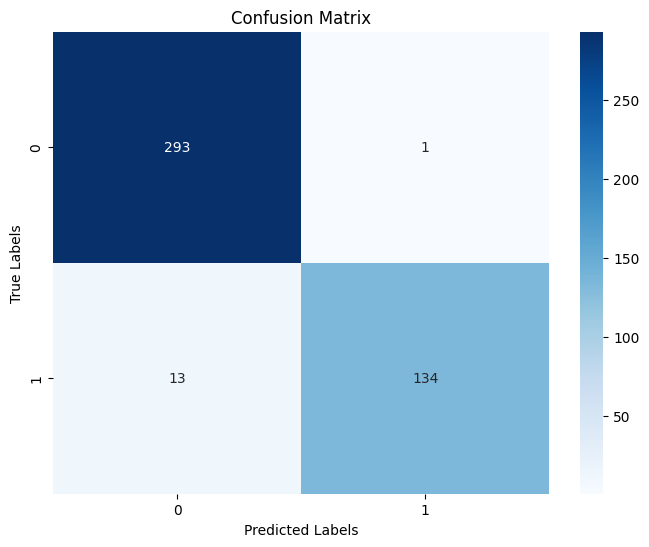

In [31]:
 import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [32]:
# import joblib

# joblib.dump(model, 'machine_stability_model.pkl')
# joblib.dump(scaler, 'stabiliy_scaler.pkl')
# joblib.dump(label_encoder, 'stability_label_encoder.pkl')

['stability_label_encoder.pkl']